In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing, decomposition

取り込んだワインデータを表示
   0      1     2     3     4    5     6     7     8     9     10    11    12  \
0   1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
1   1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
2   1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
3   1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   

     13  
0  1065  
1  1050  
2  1185  
3  1480  
特徴リスト
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
ラベルリスト
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

<function matplotlib.pyplot.show(close=None, block=None)>

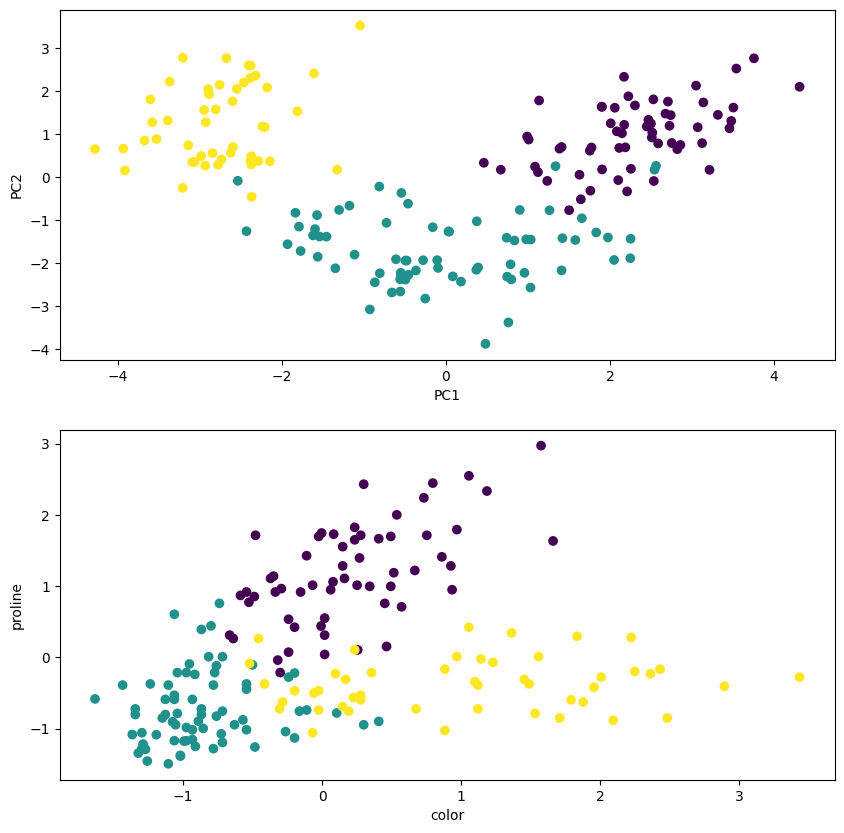

In [4]:
# データセット読み込み
df_wine_all=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
print("取り込んだワインデータを表示")
print(df_wine_all.head(4))

# 入力とラベルに分ける
X=df_wine_all.iloc[:,1:].values
Y=df_wine_all.iloc[:,0].values
print("特徴リスト")
print(X)
print("ラベルリスト")
print(Y)

# データの整形
sc=preprocessing.StandardScaler() # 標準化(平均0、分散1)
sc.fit(X)
X=sc.transform(X)

# PCAを実行
pca = decomposition.PCA(n_components=6)
X_transformed = pca.fit_transform(X)

# 結果の表示
print("固有値")
print(pca.explained_variance_)
print("固有ベクトル")
print(pca.components_)
print("寄与率：固有値/元データの次元数(14次元)分の固有値の合計")
print(pca.explained_variance_ratio_)
print("累積寄与率：寄与率の合計(第n主成分までの合計を表示)")
print(np.cumsum(pca.explained_variance_ratio_))

# 結果のプロット
%matplotlib inline
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
plt.scatter(X_transformed[:,0],X_transformed[:,1], c=Y)
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.subplot(2, 1, 2)
plt.scatter(X[:,9],X[:,12], c=Y)
plt.xlabel('color')
plt.ylabel('proline')
plt.show